# ***IMPORTING LIBRARIES***

In [7]:
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ***UPLOADING THE DATASET***

In [8]:
from google.colab import files
uploaded = files.upload()
data = pd.read_csv('match_data.csv')

Saving match_data.csv to match_data (2).csv


# ***MODIFICATION OF THE DATASET***

In [9]:
columns_to_remove = ['season', 'host_team', 'visiting_team', 'result', 'player_of_match']
data.drop(labels=columns_to_remove, axis=1, inplace=True)

In [10]:
def name_changer(data):
    if data=='M.Chinnaswamy Stadium':
        data='M Chinnaswamy Stadium'
    elif data=='Delhi Daredevils':
        data='Delhi Capitals'
    elif data=='Deccan Chargers':
        data='Sunrisers Hyderabad'
    elif data=='Pune Warriors' or data=='Rising Pune Supergiant':
        data='Rising Pune Supergiants'

    return data
data['venue']=data['venue'].apply(lambda x:name_changer(x))
data['winner']=data['winner'].apply(lambda x:name_changer(x))

# ***ANALYSIS OF DATASET***

Visualizing the number of matches played at different stadiums

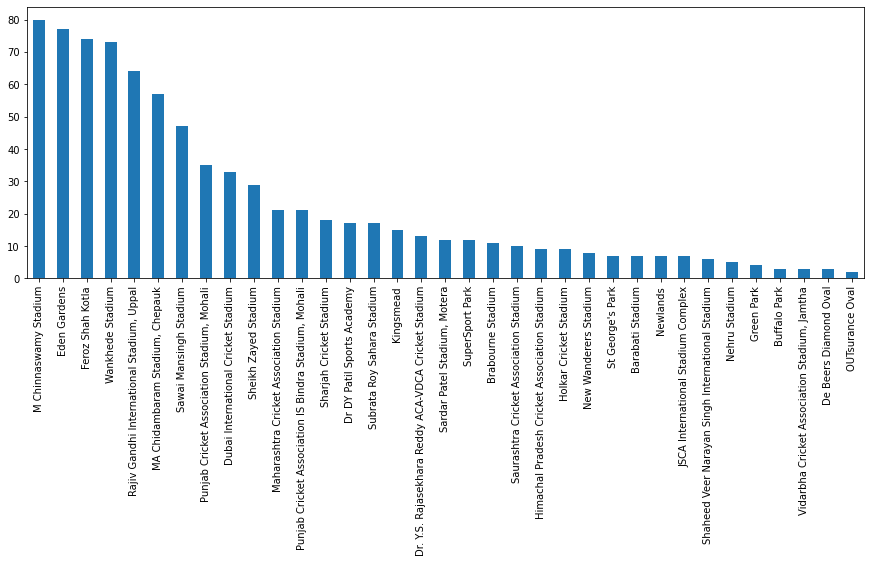

In [11]:
plt.figure(figsize=(15,5))
played=data.venue.value_counts()
data.venue.value_counts().plot.bar()
plt.savefig('pic1.png')

# ***DISPLAYING THE GIVEN DATASET***

In [12]:
data.head(7)

,dates,city,toss_winner,toss_decision,venue,winner,match_id
0,2008-04-18,Bangalore,Royal Challengers Bangalore,field,M Chinnaswamy Stadium,Kolkata Knight Riders,1.0
1,2008-04-19,Chandigarh,Chennai Super Kings,bat,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,2.0
2,2008-04-19 00:00:00,Delhi,Rajasthan Royals,bat,Feroz Shah Kotla,Delhi Capitals,3.0
3,2008-04-20,Kolkata,Deccan Chargers,bat,Eden Gardens,Kolkata Knight Riders,4.0
4,2008-04-20,Mumbai,Mumbai Indians,bat,Wankhede Stadium,Royal Challengers Bangalore,5.0
5,2008-04-21,Jaipur,Kings XI Punjab,bat,Sawai Mansingh Stadium,Rajasthan Royals,6.0
6,2008-04-22,Hyderabad,Deccan Chargers,bat,"Rajiv Gandhi International Stadium, Uppal",Delhi Capitals,7.0


# ***FINDING THE TOSS WINNERS WHO WON THE MATCH***

In [13]:
data = data[data['toss_winner']==data['winner']]
data.head(7)
processData = data

In [14]:
data.shape

(356, 7)

# ***ANALYSIS OF FILTERED DATASET***

TEAMS WINNING THE TOSS AND WINNING THE MATCH

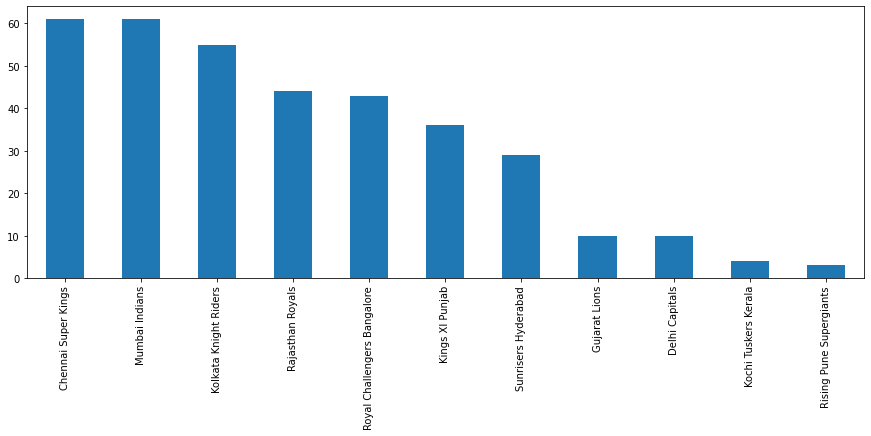

In [15]:
plt.figure(figsize=(15,5))
match_wins=data.winner.value_counts()
data.winner.value_counts().plot.bar()

TOSS DECISION TAKEN BY TOSS WINNERS WHO WON THE MATCH

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


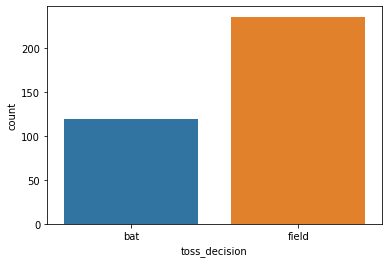

In [16]:
sns.countplot(data['toss_decision'], label='count')

# ***FILTERED DATASET FOR REGRESSION***

In [17]:
data  = data[['venue', 'toss_decision']]
data.head(7)

,venue,toss_decision
1,"Punjab Cricket Association Stadium, Mohali",bat
8,"Rajiv Gandhi International Stadium, Uppal",field
11,M Chinnaswamy Stadium,field
14,M Chinnaswamy Stadium,bat
17,Sawai Mansingh Stadium,bat
18,"Rajiv Gandhi International Stadium, Uppal",field
20,"Punjab Cricket Association Stadium, Mohali",bat


# ***REGRESSION***

*DROPPING NULL VALUES*

In [18]:
if data.isnull().values.any() == True:
    print(data.isna().sum())
else:
  print("Good to go")

Good to go


*ALLOTING DEPENDENT AND INDEPENDENT VARIABLES*

In [19]:
X = data.iloc[:, :2].values
y = data.iloc[:, -1].values

*ENCODING*

In [20]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
data.iloc[:,-1] = labelencoder_Y.fit_transform(data.iloc[:,-1].values)
y = data.iloc[:,-1]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [21]:
encoded_data = pd.get_dummies(data=data, columns=['venue'])

In [22]:
encoded_data.head(7)

,toss_decision,venue_Barabati Stadium,venue_Brabourne Stadium,venue_Buffalo Park,venue_De Beers Diamond Oval,venue_Dr DY Patil Sports Academy,venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,venue_Dubai International Cricket Stadium,venue_Eden Gardens,venue_Feroz Shah Kotla,venue_Green Park,venue_Himachal Pradesh Cricket Association Stadium,venue_Holkar Cricket Stadium,venue_JSCA International Stadium Complex,venue_Kingsmead,venue_M Chinnaswamy Stadium,"venue_MA Chidambaram Stadium, Chepauk",venue_Maharashtra Cricket Association Stadium,venue_Nehru Stadium,venue_New Wanderers Stadium,venue_Newlands,venue_OUTsurance Oval,"venue_Punjab Cricket Association IS Bindra Stadium, Mohali","venue_Punjab Cricket Association Stadium, Mohali","venue_Rajiv Gandhi International Stadium, Uppal","venue_Sardar Patel Stadium, Motera",venue_Saurashtra Cricket Association Stadium,venue_Sawai Mansingh Stadium,venue_Shaheed Veer Narayan Singh International Stadium,venue_Sharjah Cricket Stadium,venue_Sheikh Zayed Stadium,venue_St George's Park,venue_Subrata Roy Sahara Stadium,venue_SuperSport Park,"venue_Vidarbha Cricket Association Stadium, Jamtha",venue_Wankhede Stadium
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
X = encoded_data.iloc[:, 1:].values

*SPLITTING DATA IN TO TEST AND TRAIN*

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [25]:
print('X_train = {}\nX_test = {}\ny_train = {}\ny_test = {}'.format(X_train, X_test, y_train, y_test))

X_train = [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
X_test = [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
y_train = 587    1
721    0
777    0
366    0
51     1
      ..
746    0
471    0
307    1
124    1
432    1
Name: toss_decision, Length: 284, dtype: int64
y_test = 20     0
362    1
703    1
534    1
237    0
      ..
415    1
398    0
480    0
172    0
697    1
Name: toss_decision, Length: 72, dtype: int64


*LOGISTIC REGRESSION*

In [26]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

*SHAPE OF DIFFERENT ARRAYS*

In [27]:
y_train.shape

(284,)

In [28]:
encoded_data.shape

(356, 36)

In [29]:
X.shape

(356, 35)

In [30]:
y.shape

(356,)

*SAMPLE PREDICTION*

In [31]:
ground = 'Eden Gardens'
search = 'venue_'+ground
ct = 0
for i in encoded_data.columns:
  if i==search:
    row = ct
    break
  ct+=1

sample = encoded_data[encoded_data[search]==1]
sample = sample.iloc[1, 1:]
#sample.shape
sample=sample.to_numpy()
type(sample)

numpy.ndarray

In [32]:
print("type:{}\nshape:{}\nvalues:{}".format(type(X_test), X_test.shape, X_test))

type:<class 'numpy.ndarray'>
shape:(72, 35)
values:[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [33]:
sample = sample.reshape(1, -1)
print("type:{}\nshape:{}\nvalues:{}".format(type(sample), sample.shape, sample))

type:<class 'numpy.ndarray'>
shape:(1, 35)
values:[[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [34]:
def recode(y_pred):
  if y_pred==1:
    return "Field"
  else:
    return "Bat"

In [35]:
y_pred = classifier.predict(sample)
recode(y_pred)

'Field'

# ***PREDICTOR***

In [36]:
def predict(stad):
  ground = stad
  search = 'venue_'+ground
  ct = 0
  for i in encoded_data.columns:
    if i==search:
      row = ct
      break
    ct+=1
  sample = encoded_data[encoded_data[search]==1]
  sample = sample.iloc[0, 1:]
  #sample.shape
  sample=sample.to_numpy()
  sample = sample.reshape(1, -1)
  y_pred = classifier.predict(sample)
  return recode(y_pred)

In [37]:
def listStad(stad):
  lst = []
  print("\nNO IPL MATCHES HAVE BEEN PLAYED IN", stad," /NAME HAS BEEN MISPELLED(please refer to the list of stadiums below)\n")
  for i in processData['venue']:
    if i not in lst:
      lst.append(i)
      print(i) 


In [49]:
lst = list(processData['venue'])
ct = 0
for i in lst:
  ct+=1
print(ct)

356


Enter the name of the stadium: M Chinnaswamy Stadium
Go for a Field first



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


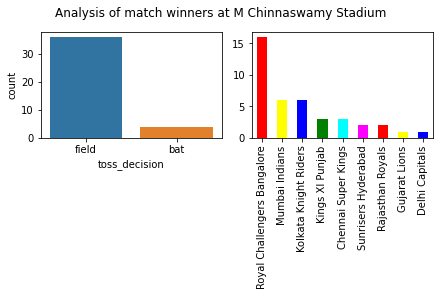

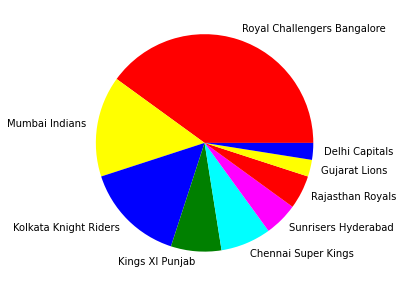

In [50]:
while True:
  stad = input("Enter the name of the stadium: ")
  tit = "Analysis of match winners at "+stad
  if stad in list(processData['venue']):
    print("Go for a", predict(stad), 'first')
    print()
    stad = processData[processData['venue']==stad]
    #stad.shape

    fig, axs = plt.subplots(1,2, constrained_layout=True)
    plt.suptitle(tit)
    colorList = ['red', 'yellow', 'blue', 'green', 'cyan', 'magenta',]
    plt.figure(figsize=(15,5))

    team=stad.winner.value_counts()
    plt.pie(list(stad['winner'].value_counts()), labels=list(stad['winner'].value_counts().keys()), colors=colorList)
    plot1 = sns.countplot(stad['toss_decision'], label='count', ax=axs[0])
    plot2 = team.plot.bar(ax=axs[1], color=colorList)
    plt.show()
    break

  else:
    print(listStad(stad))


# ***CONFUSION MATRIX***

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 6 15]
 [ 5 46]]


0.7222222222222222